## SootheMate

In Indonesia, inadequate mental health diagnosis and treatment severely impact many people's lives, manifesting in difficulties in work, education, and social relationships, and leading to increased stress, depression, anxiety, and suicide risks. Long-term stress has detrimental effects, including digestive issues, brain activity impairment, depression, kidney disease, and even cancer. Stress can also lead to post-traumatic stress disorder, significantly reducing quality of life. An October 2022 survey identified stress as the most common mental health problem among Indonesians. This highlights the urgent need for effective stress management therapies.

To solve this problem, it is important to create a solution for stress level therapy that includes tracking stress levels at a periodical intervals. This app will allow users to better manage stress and improve their overall quality of life by providing insight into how their stress levels are over time.


### Libraries

In [ ]:
# Data Manipulation
import pandas as pd

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


# Modelling
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Visualization
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Importing Dataset

In [ ]:
# Replace path with the path of the dataset file in Google Drive
path = 'https://raw.githubusercontent.com/SootheMate-Capstone-Team-C241-PS363/SootheMate-ML/main/dataset/stress_level_dataset.csv'

# Read dataset using pandas
dataset = pd.read_csv(path, index_col='Person ID')
TARGET = 'Stress Level'

# Show dataset
dataset.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Data Overview

In [ ]:
# Displays the total number of rows
jumlah_baris = dataset.shape[0]
print("Jumlah baris dalam dataset:", jumlah_baris)

# Displays the total number of columns
jumlah_kolom = dataset.shape[1]
print("Jumlah kolom dalam dataset:", jumlah_kolom)

Jumlah baris dalam dataset: 374
Jumlah kolom dalam dataset: 12


In [ ]:
# Displays a summary of dataset statistics
dataset.describe(include="all")

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


In [ ]:
# Find missing value
missing_values = dataset.isna().sum()

# Displaying results
print("Jumlah missing value untuk setiap kolom:")
print(missing_values)

# Calculate the total number of missing values
total_missing = missing_values.sum()
print("\nTotal missing value:", total_missing)

Jumlah missing value untuk setiap kolom:
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Total missing value: 219


In [ ]:
# Find duplicate rows in a DataFrame
duplikat = dataset[dataset.duplicated()]

# Display duplicate rows
print("Baris duplikat dalam dataset:")
print(duplikat)

# Count the total number of duplicates
total_duplikat = len(duplikat)
print("\nTotal duplikat:", total_duplikat)

Baris duplikat dalam dataset:
           Gender  Age            Occupation  Sleep Duration  \
Person ID                                                      
3            Male   28                Doctor             6.2   
5            Male   28  Sales Representative             5.9   
9            Male   29                Doctor             7.8   
10           Male   29                Doctor             7.8   
12           Male   29                Doctor             7.8   
...           ...  ...                   ...             ...   
370        Female   59                 Nurse             8.1   
371        Female   59                 Nurse             8.0   
372        Female   59                 Nurse             8.1   
373        Female   59                 Nurse             8.1   
374        Female   59                 Nurse             8.1   

           Quality of Sleep  Physical Activity Level  Stress Level  \
Person ID                                                          

## Data Preprocessing

### Step 1 : Feature Transformation

*Berikut adalah fitur-fitur yang sepakat ingin digunakan oleh kelompok kami*

Mandatory :
1. Gender
2. ⁠Age
3. ⁠Sleep duration
4. ⁠Quality of sleep
5. ⁠Physical Activity Level
6. ⁠Working hours

Opsional :
1. BMI category
2. ⁠Blood pressure
3. ⁠Heart rate
4. ⁠Daily steps

Sehingga, kita akan membuang kolom "sleep disorder" karena tidak relevan

In [ ]:
# Membuang kolom Sleep Disorder
data = dataset.drop(["Sleep Disorder"], axis=1)

# Membersihkan TARGET (Stress Level)
stress_lvl = {3 : 1,
              4 : 3,
              5 : 5,
              6 : 6,
              7 : 8,
              8 : 10}
data[TARGET] = data[TARGET].map(stress_lvl)

# Berikutnya, kita akan melakukan transformasi dari fitur "Occupation" menjadi working hours
working_hours = {
    'Software Engineer': '8-10',
    'Doctor': '10-16',
    'Sales Representative': '8-12',
    'Teacher': '7-9',
    'Nurse': '7-9.6',
    'Engineer': '8-10',
    'Accountant': '8-10',
    'Scientist': '8-10',
    'Lawyer': '10-12',
    'Salesperson': '8-12',
    'Manager': '9-11'
}


# Map Occupation menjadi Working hours
data['Working Hours per Day'] = data['Occupation'].map(working_hours)

data ['Min Working Hours per Day'] = data['Working Hours per Day'].apply(lambda x: x.split('-')[0]).astype(float)
data ['Max Working Hours per Day'] = data['Working Hours per Day'].apply(lambda x: x.split('-')[1]).astype(float)

# Buang kolom Occupation dan Working Hours
data_clean = data.drop(['Occupation', 'Working Hours per Day'], axis=1)

# Bersihkan kolom blood pressure
data_clean['Systolic Pressure'] = data_clean['Blood Pressure'].apply(lambda x: x.split("/")[0]).astype(float)
data_clean['Diastolic Pressure'] = data_clean['Blood Pressure'].apply(lambda x: x.split("/")[1]).astype(float)
data_clean = data_clean.drop('Blood Pressure', axis=1)

data_clean.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Min Working Hours per Day,Max Working Hours per Day,Systolic Pressure,Diastolic Pressure
Person ID,,,,,,,,,,,,,
1,Male,27,6.1,6,42,6,Overweight,77,4200,8.0,10.0,126.0,83.0
2,Male,28,6.2,6,60,10,Normal,75,10000,10.0,16.0,125.0,80.0
3,Male,28,6.2,6,60,10,Normal,75,10000,10.0,16.0,125.0,80.0
4,Male,28,5.9,4,30,10,Obese,85,3000,8.0,12.0,140.0,90.0
5,Male,28,5.9,4,30,10,Obese,85,3000,8.0,12.0,140.0,90.0


### Step 2 : Splitting

In [ ]:
# divide X and y
X = data_clean.drop(TARGET, axis=1)
y = data_clean[TARGET]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Step 3 : Encoding

In [ ]:
# separate numeric and categorical column
# train data
num_train = X_train.select_dtypes(include='number').reset_index(drop=True)
cat_train = X_train.select_dtypes(include='object')

# test data
num_test = X_test.select_dtypes(include='number').reset_index(drop=True)
cat_test = X_test.select_dtypes(include='object')

# instantiate encoder
encoder = OneHotEncoder(drop='first')

# encode
cat_train_encoded = pd.DataFrame(encoder.fit_transform(cat_train).toarray(), columns=encoder.get_feature_names_out()).reset_index(drop=True)
cat_test_encoded = pd.DataFrame(encoder.transform(cat_test).toarray(), columns=encoder.get_feature_names_out()).reset_index(drop=True)

# join
train_final = pd.concat([num_train, cat_train_encoded], axis=1)
test_final = pd.concat([num_test, cat_test_encoded], axis=1)

print(f'Final X train data : {train_final.shape[0]} baris dan {train_final.shape[1]} kolom')
print(f'Final y train data : {y_train.shape[0]} baris')
print(f'Final X test data : {test_final.shape[0]} baris dan {test_final.shape[1]} kolom')
print(f'Final y test data : {y_test.shape[0]} baris')

Final X train data : 336 baris dan 14 kolom
Final y train data : 336 baris
Final X test data : 38 baris dan 14 kolom
Final y test data : 38 baris


In [ ]:
test_final.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,Min Working Hours per Day,Max Working Hours per Day,Systolic Pressure,Diastolic Pressure,Gender_Male,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,41,7.7,8,90,70,8000,10.0,12.0,130.0,85.0,1.0,0.0,0.0,0.0
1,31,7.6,7,75,70,8000,10.0,16.0,120.0,80.0,1.0,0.0,0.0,0.0
2,35,7.3,8,60,65,5000,8.0,10.0,125.0,80.0,1.0,0.0,0.0,0.0
3,41,7.1,7,55,72,6000,10.0,12.0,125.0,82.0,1.0,0.0,0.0,1.0
4,44,6.6,7,45,65,6000,7.0,9.0,135.0,90.0,0.0,0.0,0.0,1.0


### Step 4 : Finalizing

In [ ]:
# all train data (mandatory + optional)
final_train_data_all = train_final
final_test_data_all = test_final

# mandatory train data (no optional)
final_train_data_mandatory = train_final.drop(['Diastolic Pressure', 'Systolic Pressure', 'Heart Rate', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight',  'Daily Steps'], axis=1)

# test data
final_test_data_mandatory = test_final.drop(['Diastolic Pressure', 'Systolic Pressure', 'Heart Rate', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight',  'Daily Steps'], axis=1)

### Modelling

In [ ]:
# class MyCallback(tf.keras.callbacks.Callback):
#   def __init__(self, accuracy_threshold=0.95):
#       super(MyCallback, self).__init__()
#       self.accuracy_threshold = accuracy_threshold

#   def on_epoch_end(self, epoch, logs=None):
#     logs = logs or {}
#     accuracy = logs.get('accuracy')
#     val_accuracy = logs.get('val_accuracy')

#     if accuracy is not None and val_accuracy is not None:
#       if accuracy >= self.accuracy_threshold and val_accuracy >= self.accuracy_threshold:
#         print(f"\n Pada epoch ke {epoch+1}: accuracy = {accuracy} dan  val_accuracy = {val_accuracy}.")
#         print(f"\nStopping training as both accuracy and validation accuracy have reached {self.accuracy_threshold * 100}%")
#         self.model.stop_training = True

# callbacks = MyCallback()

In [ ]:
# Menggunakan EarlyStopping untuk menghentikan pelatihan ketika kinerja pada data validasi tidak membaik
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

#### Version 1 Model

In [ ]:
# Normalisasi data
scaler = StandardScaler()
train_final_mandatory_scaled = scaler.fit_transform(final_train_data_mandatory)
test_final_mandatory_scaled = scaler.transform(final_test_data_mandatory)

# Buat instance dari LabelEncoder
label_encoder = LabelEncoder()
# Fit dan transform y
y_train_encoded_labels = label_encoder.fit_transform(y_train)
y_test_encoded_labels = label_encoder.fit_transform(y_test)

# Lakukan one-hot encoding
y_train_encoded = to_categorical(y_train_encoded_labels)
y_test_encoded = to_categorical(y_test_encoded_labels)

In [ ]:
# # https://skillplus.web.id/data-training-validation-dan-test/
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# fold_accuracies = []

# for train_index, val_index in kfold.split(train_final_mandatory_scaled):
#     X_train_fold, X_val_fold = train_final_mandatory_scaled[train_index], train_final_mandatory_scaled[val_index]
#     y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

In [ ]:
model = Sequential([
    tf.keras.layers.Dense(64, input_dim=train_final_mandatory_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax'),
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(train_final_mandatory_scaled, y_train_encoded, epochs=200, batch_size=16, validation_split=0.1, callbacks=[early_stopping])
# history = model.fit(train_final_mandatory_scaled, y_train_encoded, epochs=200, batch_size=16, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

Epoch 1/200
19/19 [==============================] - 4s 72ms/step - loss: 1.8143 - accuracy: 0.2185 - val_loss: 1.4919 - val_accuracy: 0.5000
Epoch 2/200
19/19 [==============================] - 0s 12ms/step - loss: 1.5535 - accuracy: 0.3775 - val_loss: 1.2874 - val_accuracy: 0.6471
Epoch 3/200
19/19 [==============================] - 0s 19ms/step - loss: 1.3466 - accuracy: 0.4934 - val_loss: 1.1333 - val_accuracy: 0.8529
Epoch 4/200
19/19 [==============================] - 0s 12ms/step - loss: 1.2307 - accuracy: 0.5828 - val_loss: 1.0036 - val_accuracy: 0.8529
Epoch 5/200
19/19 [==============================] - 0s 17ms/step - loss: 1.1090 - accuracy: 0.6424 - val_loss: 0.8952 - val_accuracy: 0.8529
Epoch 6/200
19/19 [==============================] - 0s 9ms/step - loss: 1.0100 - accuracy: 0.6921 - val_loss: 0.7940 - val_accuracy: 0.8529
Epoch 7/200
19/19 [==============================] - 0s 18ms/step - loss: 0.9085 - accuracy: 0.7517 - val_loss: 0.7003 - val_accuracy: 0.8529
Epoch 8

In [ ]:
loss, accuracy = model.evaluate(test_final_mandatory_scaled, y_test_encoded)
print(f"Hasil test, accuracy sebesar {accuracy} dan loss sebesar {loss}")
# loss: 0.1636 - accuracy: 0.9474

2/2 [==============================] - 0s 71ms/step - loss: 0.2471 - accuracy: 0.9474
Hasil test, accuracy sebesar 0.9473684430122375 dan loss sebesar 0.2471015900373459


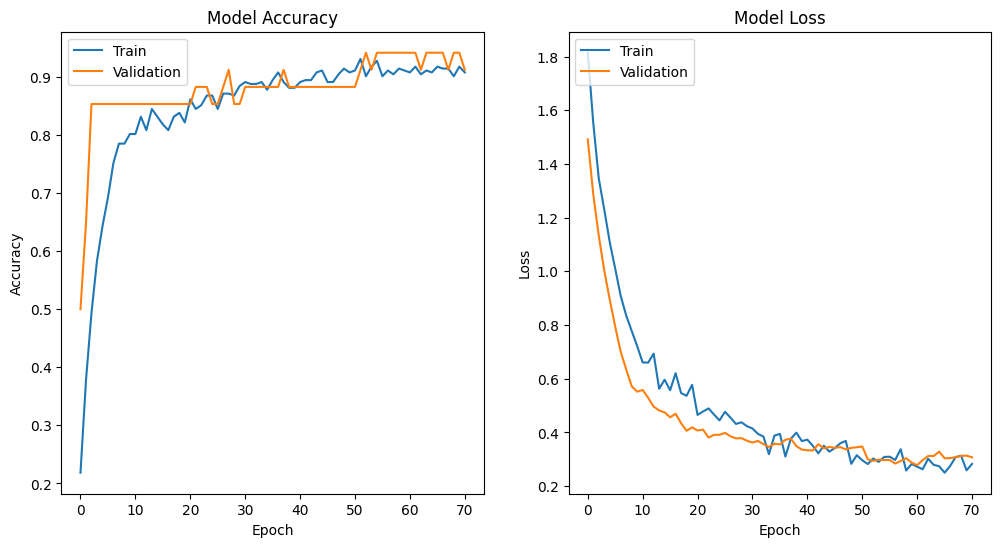

In [ ]:
# Plot training & validation accuracy values
plot_training_history(history)

In [ ]:
# Membuat prediksi
y_pred = model.predict(test_final_mandatory_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

2/2 [==============================] - 0s 7ms/step


In [ ]:
print(classification_report(y_test_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.90      0.95        10
           2       0.80      1.00      0.89         8
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         7

    accuracy                           0.95        38
   macro avg       0.97      0.94      0.95        38
weighted avg       0.96      0.95      0.95        38



In [ ]:
# # Prediksi manual menggunakan satu row data test
# # Misalkan kita memilih data pertama dari data test
# example_index = 5
# X_example = test_final_mandatory_scaled[example_index].reshape(1, -1)  # Pilih satu baris dan ubah bentuknya menjadi 2D array
# y_example_true = y_test_encoded[example_index]  # Nilai sebenarnya dari contoh tersebut
# # y_example_true = np.argmax(y_example_true, axis=1)[0]

# y_example_pred = model.predict(X_example)
# y_example_pred_class = np.argmax(y_example_pred, axis=1)[0]  # Ambil kelas yang diprediksi

# print(f"Contoh data saya ambil dari index ke-: {example_index}")
# print(f"\nFitur: {test_final_mandatory_scaled[example_index]}")
# print(f"\nStress level sebenarnya : {y_example_true}")
# print(f"\nHasil Prediksi stress level dalam probability: {y_example_pred}")
# print(f"\nHasil Prediksi stress: {y_example_pred_class}")

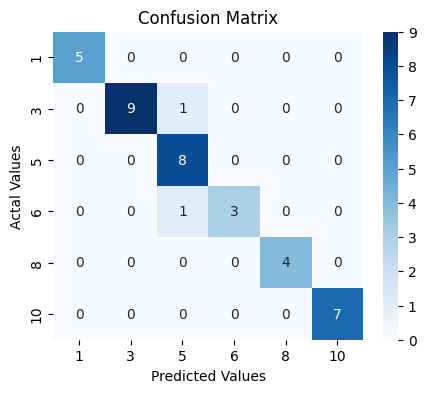

In [ ]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

cm_df = pd.DataFrame(cm,
                     index = ['1','3','5', '6', '8', '10'],
                     columns = ['1','3','5', '6', '8', '10'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# model.save("model1.h5")

#### Version 2 Model

In [ ]:
# Normalisasi data
scaler = StandardScaler()
train_final_all_scaled = scaler.fit_transform(final_train_data_all)
test_final_all_scaled = scaler.transform(final_test_data_all)

In [ ]:
model = Sequential([
    tf.keras.layers.Dense(64, input_dim=train_final_all_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax'),
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(train_final_all_scaled, y_train_encoded, epochs=100, batch_size=10, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
31/31 [==============================] - 4s 12ms/step - loss: 1.6242 - accuracy: 0.4172 - val_loss: 1.2811 - val_accuracy: 0.6471
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 1.2090 - accuracy: 0.6689 - val_loss: 0.9254 - val_accuracy: 0.8235
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.9537 - accuracy: 0.7715 - val_loss: 0.6879 - val_accuracy: 0.8235
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.7478 - accuracy: 0.8013 - val_loss: 0.5149 - val_accuracy: 0.9118
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6149 - accuracy: 0.8742 - val_loss: 0.4181 - val_accuracy: 0.9412
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5487 - accuracy: 0.8808 - val_loss: 0.3650 - val_accuracy: 0.9412
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.8775 - val_loss: 0.3245 - val_accuracy: 0.9412
Epoch 8/100


In [ ]:
# Accuracy pada data test
loss, accuracy = model.evaluate(test_final_all_scaled, y_test_encoded)
print(f"Hasil test, accuracy sebesar {accuracy} dan loss sebesar {loss}")

2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 1.0000
Hasil test, accuracy sebesar 1.0 dan loss sebesar 0.00613000662997365


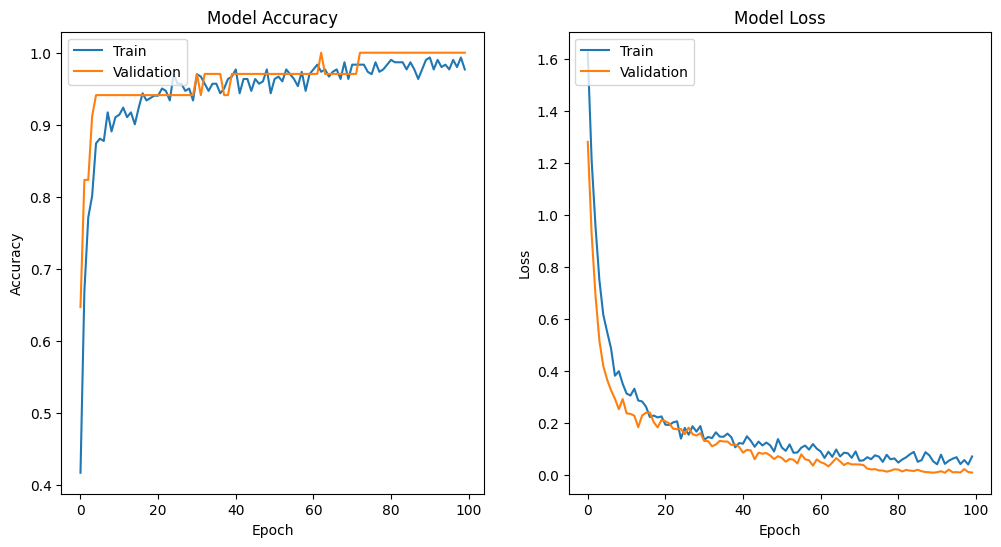

In [ ]:
# Plot training & validation accuracy values
plot_training_history(history)

In [ ]:
# Membuat prediksi
y_pred = model.predict(test_final_all_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

2/2 [==============================] - 0s 4ms/step


In [ ]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         7

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



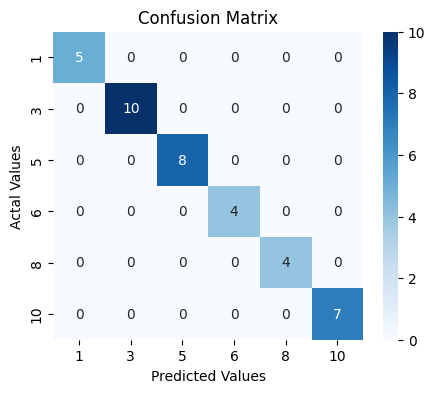

In [ ]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

cm_df = pd.DataFrame(cm,
                     index = ['1','3','5', '6', '8', '10'],
                     columns = ['1','3','5', '6', '8', '10'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# cm = confusion_matrix(y_test_classes, y_pred_classes)

In [ ]:
# plt.figure(figsize=(7, 3))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# model.save("model2.h5")

### Coba hal lain

In [ ]:
# stress level 1, 2, 9, dan 10 gadak ternyata gaes
dataset['Stress Level'].value_counts()

Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64